<a href="https://colab.research.google.com/github/nikhils10/Sentiment-Analysis-and-Classification-of-US-Airlines-from-Passenger-Tweets/blob/main/Sentiment_Analysis_%26_Classification_of_US_Airlines_Tweets_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Sentiment Analysis & Classification of US Airlines Tweet 

**Problem Type** : Sentiment Analysis and Classification (Logistic Regression, Support Vector Machines, XgBoost , Naive Bayes , Random Forests Classifier)

> Sentiment analysis and prediction(text classification) for sentiment using Pre-trained word embeddings .

> Sentiment is predicted using machine learning algorithms like Logistic Regression , SVM , XgBoost , NaiveBayes , Random forests classification

In [ ]:
## Importing and Installing Packages
!pip install wordcloud
!pip install -U spacy
!python -m spacy download en_core_web_lg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('all')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import spacy
from keras.layers.experimental.preprocessing import TextVectorization
import en_core_web_lg
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from keras import regularizers, optimizers
from keras.layers.experimental.preprocessing import TextVectorization
from keras.layers import Embedding, Dense, Dropout, Input, LSTM, GlobalMaxPool1D
from keras.models import Sequential

##Matplotlib Parameters
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['figure.figsize'] = 6,6
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')


In [ ]:
## Loading Data 
file_path = '/content/drive/MyDrive/NLP Project/Tweets.csv'
airlines_df = pd.read_csv(file_path)
airlines_df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
airlines_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


## Getting to Know Our Data


In [ ]:
## Getting to Know Our Data
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
## Dimensions of our Dataset
airlines_df.shape

(14640, 15)

# **Data Description :-**

**Source of Data Collection**:Collected from Kaggle Repository, https://www.kaggle.com/crowdflower/twitter-airline-sentiment

**Data Dimentions :-**

-> 14640 Attributes

-> 15 Features

-------------------------

**About Data** :-
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").



**About Features** :- 
**tweet_id** : ID for the tweet

**airline_sentiment** : Sentiment about the tweet whether the tweet is classified as positive , negative or neutral.

**airline_sentiment_confidence**: confidence for the sentiment 

**negativereason**: Reason given in pre-defined categories to define the negative tweet. 

**negativereason_confidence**: confidence of negative reason given

**airline**: Which airline did the passenger travel in

**airline_sentiment_gold**:

**name**: name of passenger 

**negativereason_gold**:

**retweet_count**: Number of times the tweet got retweeted

# Exploratory Data Analysis

Text(0.5, 1.0, 'Tweet Sentiment Class Distribution')

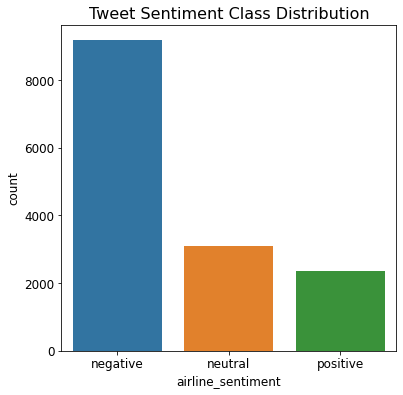

In [ ]:
## Seeing the Sentiments
rcParams['figure.figsize'] = 6,6
ax = sns.countplot(x="airline_sentiment", data=airlines_df,order = airlines_df['airline_sentiment'].value_counts().index)
ax.set_title('Tweet Sentiment Class Distribution',fontsize=16)

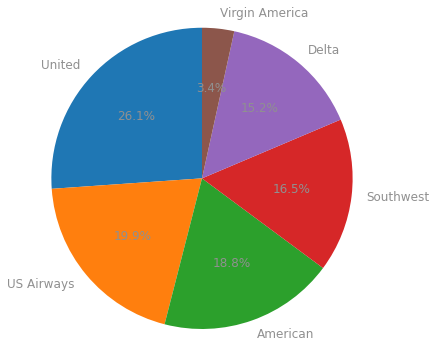

In [ ]:
airline_counts = airlines_df['airline'].value_counts()
labels = airline_counts.index
sizes = airline_counts.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

United has the most number of tweets in the dataset followed by US Airways and American .

# Feature Engineering 
(To see the number of Negatives to Total Number of Tweets )
Just observing number of negatives is not a good metric as each airlines has different number of tweets .
A better metric is to see percentage of negative tweets in comparision to number of neutral and positive tweets.

In [ ]:
## (Number of negative tweets) / Total Tweets
airline_counts

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [ ]:
airline_sentiment_counts = airlines_df[['airline','airline_sentiment']].value_counts()
airline_sentiment_counts

[airline         airline_sentiment
 United          negative             2633
 US Airways      negative             2263
 American        negative             1960
 Southwest       negative             1186
 Delta           negative              955
                 neutral               723
 United          neutral               697
 Southwest       neutral               664
                 positive              570
 Delta           positive              544
 United          positive              492
 American        neutral               463
 US Airways      neutral               381
 American        positive              336
 US Airways      positive              269
 Virgin America  negative              181
                 neutral               171
                 positive              152
 dtype: int64]

In [ ]:
df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')

0
airline        airline_sentiment      
United         negative           2633
US Airways     negative           2263
American       negative           1960
Southwest      negative           1186
Delta          negative            955
               neutral             723
United         neutral             697
Southwest      neutral             664
               positive            570
Delta          positive            544
United         positive            492
American       neutral             463
US Airways     neutral             381
American       positive            336
US Airways     positive            269
Virgin America negative            181
               neutral             171
               positive            152

**Inference** : According to the above figure looks like most of the sentiments belong to negative class followed by neutral and then positive . Indicating a huge class imbalance which we have to deal with in the later stages.

Text(0.5, 1.0, 'Tweet Sentiment Class Distribution by Airline')

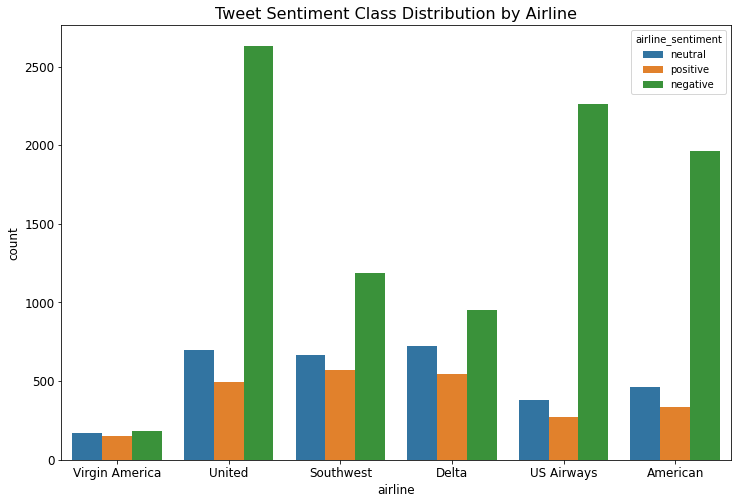

In [ ]:
## Divide Sentiments by Airlines 
rcParams['figure.figsize'] = 12,8
ax = sns.countplot(x="airline",hue='airline_sentiment', data=airlines_df)
ax.set_title('Tweet Sentiment Class Distribution by Airline',fontsize=16)

> Virgin America distinctly stands out as the airline which has equal distribution of sentiments (almost no class imbalance), which is better than having lot of negative reviews and less neutral/positive reviews.

> United has the most number of negative reviews .

> Southwest and Delta are relatively fine in comparision to US Airways , American and United as they relatively have less negative sentiment in comparision to their neutral/positive classes.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

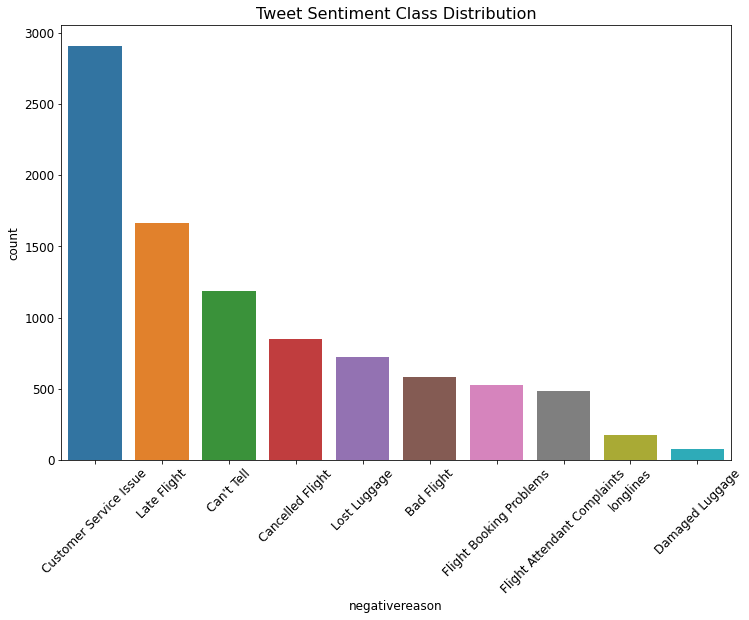

In [ ]:
##negative reason
rcParams['figure.figsize'] = 12,8
ax = sns.countplot(x="negativereason", data=airlines_df,order = airlines_df['negativereason'].value_counts().index)
ax.set_title('Tweet Sentiment Class Distribution',fontsize=16)
plt.xticks(rotation=45)

> Each negative tweet is futher classified into the above classes which give more details why the tweet is classified as negative .

> Above plot shows that Customer Service has been leading issue in all the issues . Late Flight , Cancelled Flight and Lost Luggage comprise of larger part of the complaints that are recorded . 

> Flight attendant complaints and Damaged luggage seem to be less frequent problems for passengers.


Most tweets indicate , majority of the problems being Customer service ,late flight adn cancelled flight . Damaged luggage and longlines seem to be less common problems for passengers .

In [ ]:
airlines_df['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [ ]:
## Filtering Negative Reason by Airlines
rcParams['figure.figsize'] = 12,8
ax = sns.countplot(x='negativereason',data=airlines_df,order = airlines_df['negativereason'].value_counts().index)
plt.xticks(rotation=45)
ax.set_title('Distribution of Negative Tweet Reason',fontsize=16)

In [ ]:
## Most Frequent Words in Negative Sentiment

def gen_wordcloud(sentiment_string):
    sentiments = airlines_df.loc[airlines_df['airline_sentiment']==sentiment_string,['text']]
    sentiments_words = ' '.join(sentiments['text'])
    cleaned_sentiment = ''.join([word for word in sentiments_words.split()
    if 'http' not in word and not word.startswith('@') and word != 'RT'
    ])
    wordcloud = WordCloud(
                stopwords = STOPWORDS,
                min_font_size = 10,width=3000,height=2500).generate(cleaned_sentiment)
    plt.imshow(wordcloud)

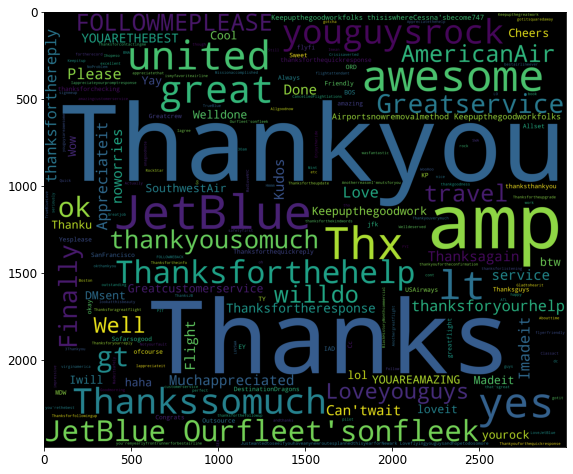

In [ ]:
## Most Frequent Words in Positive Sentiment
gen_wordcloud('positive')

According to word cloud some most frequent positive words are :-
> Thanks , Thankyou,thankyousomuch,great,awesome,Thx,greatservice , etc.

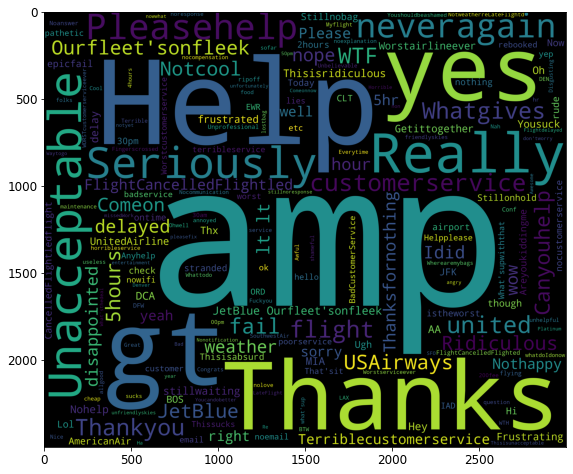

In [ ]:
## Most Frequent Words in Negative Sentiment
gen_wordcloud('negative')

According to word cloud some most frequent negative words are :-

> Unacceptable ,Help , Seriously , really , etc.

>


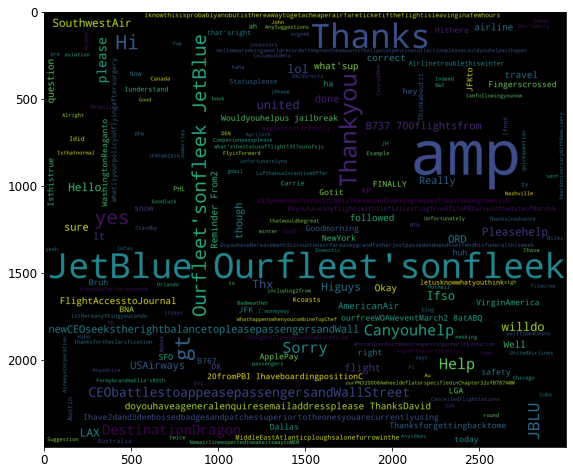

In [ ]:
## Most Frequent Words in Neutral Sentiment
gen_wordcloud('neutral')

According to word cloud some most neutral negative words are :-

There seem to be not many distinguishable neutral words .
Like the frequency of neutral words very frequent is quite less.


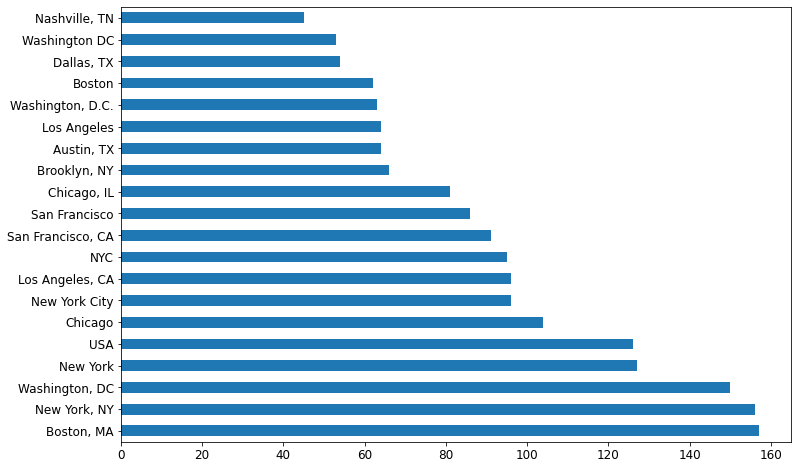

In [ ]:
##majority of the locations from where tweets orignated
airlines_df['tweet_location'].value_counts().head(20).plot(kind='barh')

Larger parts of tweets come from locations like :-
> New York, Boston , Washington , Los Angeles , Chicago , etc.

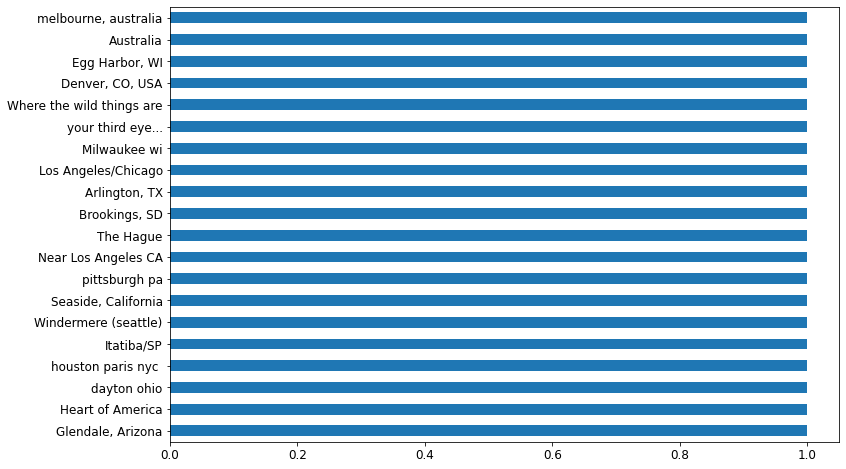

In [ ]:
airlines_df['tweet_location'].value_counts().tail(20).plot(kind='barh')

# Data Preprocessing

# Missing Values

In [ ]:
## removing columns with high missing data

In [ ]:
print("Percentage Nan/null values ")
round(airlines_df.isna().sum()*100/airlines_df.shape[0],2)

Percentage Nan/null values 


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

Since features like airline_sentiment_gold,negativereason_gold,tweet_coord can be deleted since they have missing values over 90% and imputation wouldn't make sense in this case

# Data Cleaning

## Lowercasing 

In [ ]:
##converting into lowercase
airlines_df['text'] = airlines_df['text'].apply(lambda x:x.lower())
airlines_df['text']

0                      @virginamerica what @dhepburn said.
1        @virginamerica plus you've added commercials t...
2        @virginamerica i didn't today... must mean i n...
3        @virginamerica it's really aggressive to blast...
4        @virginamerica and it's a really big bad thing...
                               ...                        
14635    @americanair thank you we got on a different f...
14636    @americanair leaving over 20 minutes late flig...
14637    @americanair please bring american airlines to...
14638    @americanair you have my money, you change my ...
14639    @americanair we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

By lowercasing we make sure each word is only counted once. For example we don't want Today,today,TODAY , etc to be counted as different word instances . By lowercasing all todays will be counted into one word.

In [ ]:
##remove all @tags from the tweets , remove emoji's if any .
## convert short form words for twitter and lemmitize them as per requirement
##airlines_df['text'] = airlines_df['text'].apply(lambda x:word_tokenize(x))

##removed the @handle from tweet
from nltk.tokenize import TweetTokenizer
airlines_df['text'] = airlines_df['text'].apply(lambda x:TweetTokenizer(strip_handles=True).tokenize(x))
airlines_df['text']

0                                          [what, said, .]
1        [plus, you've, added, commercials, to, the, ex...
2        [i, didn't, today, ..., must, mean, i, need, t...
3        [it's, really, aggressive, to, blast, obnoxiou...
4        [and, it's, a, really, big, bad, thing, about,...
                               ...                        
14635    [thank, you, we, got, on, a, different, flight...
14636    [leaving, over, 20, minutes, late, flight, ., ...
14637    [please, bring, american, airlines, to, #black...
14638    [you, have, my, money, ,, you, change, my, fli...
14639    [we, have, 8, ppl, so, we, need, 2, know, how,...
Name: text, Length: 14640, dtype: object

Tweets contain @tags which are not useful for sentiment analysis.We remove these tag headers .

In [ ]:
##remove stopwords
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

##Remove punctuation from the words after stopwords
punctuation_set = set(string.punctuation)
import string

##stopwords -we fetch a list of stopwords
stop_words_set = set(stopwords.words('english'))

##stopwords removal
def remove_stopwords(sentence):
  filtered_words = []
  for word in sentence:
    if word not in stop_words_set:
      filtered_words.append(word) 
  
  return filtered_words

##punctuation removal
def remove_punctuations(sentence):
  filtered_words = []
  for word in sentence:
    if word not in punctuation_set:
      filtered_words.append(word) 
  
  return filtered_words

##maybe maybe not -will decide later
##punctuation removal
def remove_small_words(sentence):
  filtered_words = []
  for word in sentence:
    if len(word)>3:
      filtered_words.append(word) 
  
  return filtered_words

In [ ]:
remove_small_words(airlines_df['text'][2])

["didn't", 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']

## Removing Stopwords

In [ ]:
airlines_df['text'] = airlines_df['text'].apply(remove_stopwords)
# airlines_df['text'] = airlines_df['text'].apply(remove_punctuations)
airlines_df['text'] 

0                                                [said, .]
1        [plus, added, commercials, experience, ..., ta...
2        [today, ..., must, mean, need, take, another, ...
3        [really, aggressive, blast, obnoxious, ", ente...
4                                [really, big, bad, thing]
                               ...                        
14635          [thank, got, different, flight, chicago, .]
14636    [leaving, 20, minutes, late, flight, ., warnin...
14637    [please, bring, american, airlines, #blackberr...
14638    [money, ,, change, flight, ,, answer, phones, ...
14639    [8, ppl, need, 2, know, many, seats, next, fli...
Name: text, Length: 14640, dtype: object

Removing stopwords from our tweets as it does not contribute towards our problem. Stop words removal can help us remove the low level information we have in our tweets.

## Removing Punctuations

In [ ]:
airlines_df['text'] = airlines_df['text'].apply(remove_punctuations)
# airlines_df['text'] = airlines_df['text'].apply(remove_punctuations)
airlines_df['text']

0                                                   [said]
1        [plus, added, commercials, experience, ..., ta...
2        [today, ..., must, mean, need, take, another, ...
3        [really, aggressive, blast, obnoxious, enterta...
4                                [really, big, bad, thing]
                               ...                        
14635             [thank, got, different, flight, chicago]
14636    [leaving, 20, minutes, late, flight, warnings,...
14637    [please, bring, american, airlines, #blackberr...
14638    [money, change, flight, answer, phones, sugges...
14639    [8, ppl, need, 2, know, many, seats, next, fli...
Name: text, Length: 14640, dtype: object

Removing punctuations also helps us remove the low level information from our tweets.

## Lemmatization

In [ ]:
##wordnet_lemmatizer.lemmatize(airlines_df['text'][3])
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(x):
    return [wordnet_lemmatizer.lemmatize(w) for w in x]

airlines_df['text'] = airlines_df['text'].apply(lemmatize)

By lemmatizing our tweets we can group synonyms into similar root words which will help us in decreasing noise and also help us reduce our corpus size .Can help us speed things .

## Stratified K Folds (Train -Cross Validate -Test Split)

In [ ]:
##Using stratified version of train-test split 

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
X = airlines_df[['text']]
Y = airlines_df[['airline_sentiment']]
trainX, testX, trainy, testy = train_test_split(X, Y, test_size=0.25, random_state=123, stratify=Y)

Instead of simple train-test split we carry out **Stratified train-test split** which will help us divide our training and testing data to ensure that relative class frequencies is approximately preserved in each train and validation fold.

Also we generate **Stratified K Folds** for cross validation , this is better than generating normal K Folds since during class imbalances such as our problem , we can have equal representation by all classes in our K-Folds as well.

## Text Vectorization(Word2Vec) by Using Pre-trained WordEmbeddings using Spacy 

In [ ]:
nlp = en_core_web_lg.load()
Vectorizer = TextVectorization()

In [ ]:
##language pipeline-trying with basic model
##en_core_web_trf -try this is the best model-developed in mit
import spacy
import en_core_web_lg

nlp = spacy.load("en_core_web_lg")

In [ ]:
def get_vector(x):
    doc = nlp(x)
    return doc.vector

In [ ]:
def join_words_back(x):
    return ' '.join(x)
airlines_df['text'] = airlines_df['text'].apply(lambda x : join_words_back(x))

## Generating word2Vec seperately for training and testing datasets

In [ ]:
## word2vec for combined for training and testing - 
wordvec_arrays = np.zeros((len(airlines_df['text']), 300)) 

for i in range(len(airlines_df['text'])):
    wordvec_arrays[i,:] = get_vector(airlines_df['text'][i]).reshape(1,300)
    wordvec_df = pd.DataFrame(wordvec_arrays)

In [ ]:
## generating word2vec seperately for training and testing datasets
X_resampled = pd.DataFrame(X_resampled)[0]
X_resampled[0]

'sitting plane 2.5 hr gate due computer sys issue point cancelled flight flight ridiculous'

In [ ]:
textX = testX['text']

In [ ]:
textX = pd.DataFrame(textX)
textX.iloc[0,0]

"i'm airport right people know react help situation frustrated"

In [ ]:
X = airlines_df[['text']]
Y = airlines_df[['airline_sentiment']]
trainX, testX, trainy, testy = train_test_split(X, Y,shuffle=True, test_size=0.25, random_state=123, stratify=Y)

## do undersampling for training set
rus = RandomUnderSampler(random_state=123)
rus.fit(trainX, trainy)
X_resampled, y_resampled = rus.fit_sample(trainX, trainy)
X_resampled = pd.DataFrame(X_resampled)[0]

## generate word2vec for training 
## word2vec for combined for training and testing - 
wordvec_train = np.zeros((len(X_resampled), 300)) 

for i in range(len(X_resampled)):
    wordvec_train[i,:] = get_vector(X_resampled[i]).reshape(1,300)
    wordvec_train_df = pd.DataFrame(wordvec_train)


## generate word2vec for testing 
# textX = testX['text']
wordvec_test = np.zeros((len(testX), 300)) 

for i in range(len(testX)):
    wordvec_test[i,:] = get_vector(testX.iloc[i,0]).reshape(1,300)
    wordvec_test_df = pd.DataFrame(wordvec_test)



In [ ]:
wordvec_test = np.zeros((len(testX), 300)) 

for i in range(len(testX)):
    wordvec_test[i,:] = get_vector(testX.iloc[i,0]).reshape(1,300)
    wordvec_test_df = pd.DataFrame(wordvec_test)

In [ ]:
wordvec_test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.049614,0.219163,-0.297068,-0.014825,0.054903,0.015558,0.036533,-0.045296,0.046621,2.576820,-0.396131,0.036708,0.085365,-0.060452,-0.227512,-0.079363,-0.138478,0.789325,-0.142562,0.032334,0.024338,-0.041831,-0.015321,-0.126931,-0.074811,-0.068581,-0.155521,-0.156622,0.107897,-0.371779,-0.115913,0.054000,-0.127930,0.001638,0.124735,0.091379,0.157582,0.056199,-0.213291,-0.156193,...,-0.081461,0.034988,0.122081,-0.108240,0.010026,-0.092077,-0.082362,0.152120,0.329543,0.207349,0.034104,0.010754,-0.164644,-0.155030,-0.064822,0.034682,0.140391,-0.070298,0.019252,0.210351,-0.071998,-0.026169,0.025084,0.023530,-0.055329,-0.014692,0.215276,-0.071496,0.056442,0.182984,-0.119534,0.061870,0.063338,-0.103183,0.322513,0.070385,-0.131016,-0.007374,0.133869,0.207041
1,-0.139943,0.087195,0.066275,0.022832,0.097124,0.009981,0.049361,-0.071972,-0.014355,1.831241,-0.287614,0.065783,0.028658,0.204276,-0.053947,-0.076014,-0.049494,1.001831,0.170124,0.127474,-0.039953,0.078848,-0.079641,0.028867,0.065498,-0.058290,-0.072580,-0.227690,0.077634,0.230106,0.031808,0.145859,0.143291,0.053788,-0.252198,0.219401,-0.050956,-0.099461,-0.044425,-0.090828,...,-0.028547,0.125638,0.040743,0.107411,-0.021850,-0.243646,0.037030,0.120361,0.397966,-0.111966,0.058156,0.048825,0.189145,-0.138532,0.221125,0.112320,0.006560,0.110690,-0.015967,0.128895,-0.224893,0.077831,0.096982,-0.055944,-0.062309,-0.061828,0.077118,-0.135920,0.090978,0.100181,0.006828,0.210630,0.057601,-0.014858,0.156156,-0.052892,-0.099080,0.096664,0.183437,-0.037136
2,-0.001855,-0.051880,-0.218688,0.224455,0.059505,-0.109725,-0.020487,-0.382698,-0.154628,0.758475,-0.323390,0.003492,0.067144,-0.076602,0.090411,-0.074524,0.040395,0.496892,-0.078780,0.078506,0.123245,0.036340,-0.009397,-0.131633,0.106661,0.003790,-0.114227,-0.094060,0.211513,-0.167232,0.189980,0.107870,0.019654,0.068522,-0.167481,0.095603,-0.194920,-0.004161,0.046959,-0.065987,...,0.189990,-0.048385,-0.008280,-0.086198,-0.051832,-0.209390,-0.050818,0.182370,0.520975,0.087436,-0.048387,-0.046693,0.026131,0.176530,-0.064076,0.178682,-0.029223,0.004951,-0.012994,-0.080240,0.051347,0.062747,0.160257,-0.002195,0.035851,0.054024,0.226108,-0.002005,0.069605,0.002021,-0.107005,-0.058174,-0.108682,-0.033085,0.267075,-0.261777,-0.110375,-0.105523,0.044895,0.220773
3,-0.088504,0.344509,0.232412,0.013984,0.037860,0.104391,0.150820,0.005664,0.062506,1.317280,-0.256425,-0.137642,-0.048877,0.083972,-0.206872,-0.083242,-0.113744,0.731219,0.128701,-0.099996,-0.043144,0.128686,-0.086677,-0.026835,0.055775,-0.052594,-0.332166,-0.082256,0.289046,0.002505,-0.223382,0.086367,0.125736,0.138933,-0.170978,0.284056,0.039110,0.191533,0.036300,-0.091847,...,0.120463,0.056387,-0.059708,-0.007212,-0.112895,-0.262799,-0.149686,0.246224,-0.047204,0.023825,-0.195152,0.154850,0.008994,-0.100355,0.070642,0.121263,-0.007953,-0.129040,0.029571,0.265460,-0.137428,-0.222391,-0.070278,0.035670,0.032644,0.173016,0.169535,-0.189939,-0.000463,0.229973,0.178804,0.281819,0.029569,-0.145290,0.197723,-0.297589,-0.117237,0.014441,-0.115065,-0.026271
4,0.031491,-0.116715,-0.056061,-0.096141,0.531485,-0.009172,0.222678,-0.008674,-0.049022,0.997070,-0.516020,-0.157289,-0.022199,0.113970,0.035615,-0.010498,-0.266612,0.792352,0.349995,0.108779,0.126975,0.111239,0.057227,-0.153846,-0.029531,0.116802,-0.302442,-0.025208,0.008342,0.242157,0.039398,-0.050406,0.174387,0.428483,0.075066,0.069890,-0.111245,-0.179148,-0.214884,-0.070401,...,0.131726,-0.074546,-0.031119,-0.099929,0.042669,-0.228901,0.150390,0.089546,-0.329091,0.171048,-0.620392,0.084665,0.281136,-0.085902,0.114905,0.336124,0.150900,-0.196667,0.201169,0.223905,-0.098414,-0.258055,0.166049,0.034427,0.099518,0.235009,0.037212,-0.030644,0.109396,0.132577,0.095

We need to vectorize our text data to make it machine readable . Many techniques like Bag of words, tdf-idf might work but in many cases are less effective to something like **word2Vec**,by generating word embeddings(which is representing words into higher dimensionality space ) using pre-trained word embeddings helps us create much more accurate embeddings than training our custom embeddings which is limited to small corpus .

We use **Spacy** libraries pre-trained word embeddings using **en_core_web_lg**,traine on large corpus containing 685k unique vectors of  (300 dimensions).

Our embeddings generated are of 300 dimensions .

In [ ]:
wordvec_df = pd.read_csv('/content/drive/MyDrive/NLP Project/X.csv')
Y = pd.read_csv('/content/drive/MyDrive/NLP Project/y.csv')


In [ ]:
wordvec_df.drop(labels=['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
Y.drop(labels=['Unnamed: 0'],axis=1,inplace=True)

## Stratified K Folds (Train -Cross Validate -Test Split)

In [ ]:
##Using stratified version of train-test split 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
X = wordvec_df
Y = Y
trainX, testX, trainy, testy = train_test_split(X, Y, test_size=0.25, random_state=123, stratify=Y)

# Dealing with Class Imbalance 

In [ ]:
##making the training dataset balanced
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
trainy.value_counts()

airline_sentiment
negative             6884
neutral              2324
positive             1772
dtype: int64

Since we have good deal of class imbalance , we need to deal with this imbalance and convert our training dataset into a dataset where there is equal representation of target classes .
Many ways to solve this by oversampling the minority classes, undersampling the larger classes or using SMOTE (synthetic generation) of data to create more data .

We use **undersampling** and create a balanced dataset.

In [ ]:
rus = RandomUnderSampler(random_state=123)
rus.fit(trainX, trainy)
X_resampled, y_resampled = rus.fit_sample(trainX, trainy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
## it undersamples your data 
pd.DataFrame(y_resampled).value_counts()

positive    1772
neutral     1772
negative    1772
dtype: int64

As we can see after undersampling we have now a balanced training dataset.

## Cross Validation by using Stratified K Folds 

In [ ]:
## new training data is now having no class imbalance 
## you can train now
## using cross validation -stratified k folds -it make sures to have equal holds as per class
from sklearn.model_selection import RepeatedStratifiedKFold
## change to 10 when doing final computation 
stratified_cv = StratifiedKFold(n_splits=2, random_state=123)
##n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## Model Hyper-parameter Tuning -defining Parameters

In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'xgboost':{'model':XGBClassifier(max_depth=6),
              'params':{'n_estimators':[50,100]}},

    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

Defining hyper-parameters for the machine learning algorithms to tune for using **GridSearchCV**, which helps us use the stratified K folds cross validation we defined earlier . Grid Search uses the cross validation folds defined earlier and searches for the  best model parameters that would result in most accurate model.

In [ ]:
## Get do cross validation, get_best_score,best_params
def best_model(model_name,x,y):
    grid_search_cv = GridSearchCV(model_params[model_name]['model'],model_params[model_name]['params'],cv=stratified_cv)
    grid_fit = grid_search_cv.fit(x,y)
    best_score = grid_fit.best_score_
    best_params = grid_fit.best_params_
    model_with_best_params = grid_fit.best_estimator_
    return best_score,best_params,model_with_best_params

## generate report of training or testing 
def generate_report(x,y,model):
    preds = model.fit(x,y).predict(x)
    print(classification_report(y,preds))
    plot_confusion_matrix(model,x,y)


## Logistic Regression 

In [ ]:
logistic = LogisticRegression()
param_logistic = {'multi_class':['auto']}
grid_logistic = GridSearchCV(logistic,param_grid=param_logistic,cv=stratified_cv)
grid_logistic.fit(X_resampled,y_resampled)


In [ ]:
best_score,best_params,model_with_best_params = best_model('logistic_regression',X_resampled,y_resampled)

In [ ]:
best_score
best_params
## now once you have model with best params -pass it into your next function and get the predictions for both train and test
## analyze the results there itself 
model_with_best_params

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Train Data Report Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

    negative       0.77      0.80      0.78      1772
     neutral       0.71      0.70      0.70      1772
    positive       0.81      0.79      0.80      1772

    accuracy                           0.76      5316
   macro avg       0.76      0.76      0.76      5316
weighted avg       0.76      0.76      0.76      5316



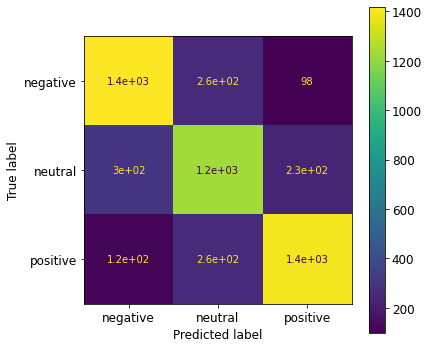

In [ ]:
generate_report(X_resampled,y_resampled,model_with_best_params)

## Test Data Report Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      2294
     neutral       0.73      0.51      0.60       775
    positive       0.85      0.68      0.75       591

    accuracy                           0.81      3660
   macro avg       0.80      0.71      0.74      3660
weighted avg       0.80      0.81      0.80      3660



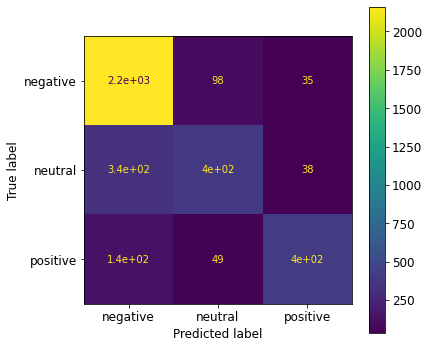

In [ ]:
## Testing Dataset
generate_report(testX,testy,model_with_best_params)

**Results Logistic Regression**

# Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
stratified_cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=123)
cross_val_score(SVC(gamma='auto'),X_resampled,y_resampled,cv=stratified_cv)

In [ ]:
scores = []

for model_name, params in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=stratified_cv, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
model_params.items()

In [ ]:
best_score_svm,best_params_svm,model_with_best_params_svm = best_model('svm',X_resampled,y_resampled)

In [ ]:
best_score_svm

0.7231000752445448

In [ ]:
best_params_svm

{'C': 20, 'kernel': 'rbf'}

In [ ]:
model_with_best_params_svm

SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Train Data Report SVM

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

    negative       0.76      0.81      0.79      1772
     neutral       0.74      0.70      0.72      1772
    positive       0.81      0.79      0.80      1772

    accuracy                           0.77      5316
   macro avg       0.77      0.77      0.77      5316
weighted avg       0.77      0.77      0.77      5316



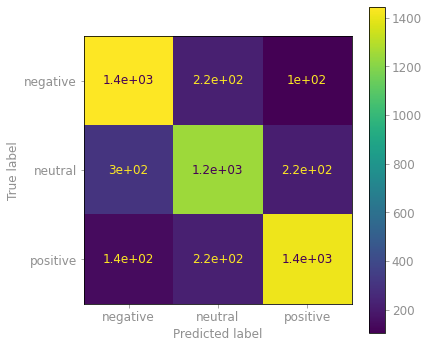

In [ ]:
generate_report(X_resampled,y_resampled,model_with_best_params_svm)

## Test Data Report SVM

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

    negative       0.81      0.96      0.88      2294
     neutral       0.78      0.45      0.57       775
    positive       0.84      0.70      0.76       591

    accuracy                           0.81      3660
   macro avg       0.81      0.70      0.74      3660
weighted avg       0.81      0.81      0.79      3660



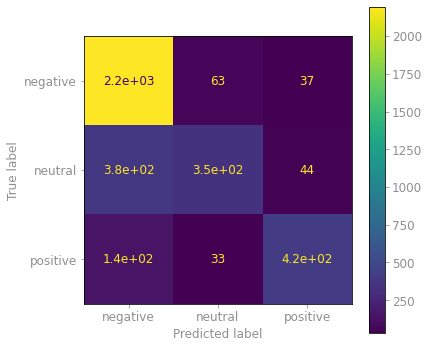

In [ ]:
generate_report(testX,testy,model_with_best_params_svm)

**Results for SVM** 

**Results for Naive Bayes** 

# XgBOOST

In [ ]:
## see cross validation score 
## get the best params for each model
## then you can select that model and train it 
## after that you can show the results on test data
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
best_score,best_params,model_with_best_params = best_model('xgboost',X_resampled,y_resampled)
print(best_score)
print(model_with_best_params)

In [ ]:
best_score

In [ ]:
model_with_best_params

In [ ]:
best_score_xgboost,best_params_xgboost,model_with_best_params_xgboost = best_model('xgboost',X_resampled,y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
best_score_xgboost

0.7054176072234764

In [ ]:
best_params_xgboost

{'n_estimators': 100}

In [ ]:
model_with_best_params_xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Train Data Report XgBoost

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1772
     neutral       0.99      0.98      0.99      1772
    positive       0.98      1.00      0.99      1772

    accuracy                           0.99      5316
   macro avg       0.99      0.99      0.99      5316
weighted avg       0.99      0.99      0.99      5316



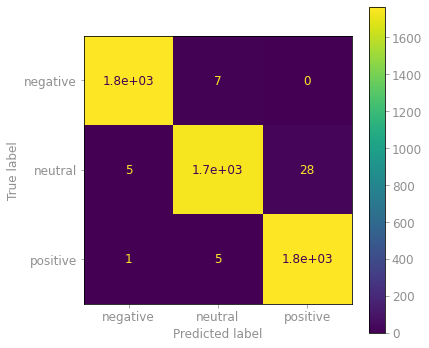

In [ ]:
generate_report(X_resampled,y_resampled,model_with_best_params_xgboost)

## Test Data Report XGBoost

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      2294
     neutral       0.99      0.99      0.99       775
    positive       0.98      1.00      0.99       591

    accuracy                           1.00      3660
   macro avg       0.99      0.99      0.99      3660
weighted avg       1.00      1.00      1.00      3660



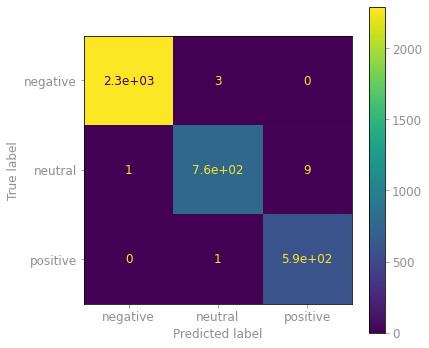

In [ ]:
generate_report(testX,testy,model_with_best_params_xgboost)

## Random Forests Classifier

In [ ]:
best_score_rf,best_params_rf,model_with_best_params_rf = best_model('random_forest',X_resampled,y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
best_score_rf

0.5974416854778029

In [ ]:
best_params_rf

{'n_estimators': 10}

In [ ]:
model_with_best_params_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Train Data Random Forests

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


              precision    recall  f1-score   support

    negative       0.98      0.99      0.99      1772
     neutral       0.98      0.97      0.98      1772
    positive       0.98      0.98      0.98      1772

    accuracy                           0.98      5316
   macro avg       0.98      0.98      0.98      5316
weighted avg       0.98      0.98      0.98      5316



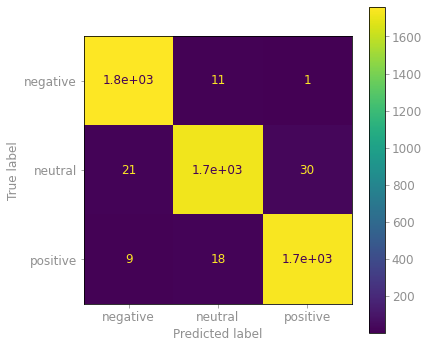

In [ ]:
generate_report(X_resampled,y_resampled,model_with_best_params_rf)

## Test Data Random Forests

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


              precision    recall  f1-score   support

    negative       0.98      1.00      0.99      2294
     neutral       0.99      0.95      0.97       775
    positive       0.98      0.96      0.97       591

    accuracy                           0.98      3660
   macro avg       0.98      0.97      0.98      3660
weighted avg       0.98      0.98      0.98      3660



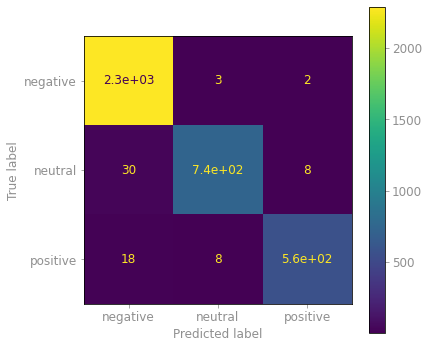

In [ ]:
generate_report(testX,testy,model_with_best_params_rf)

**Results for Random Forests Classifier** 

In [ ]:
## checking logistic regression with different w2v train test

In [ ]:
## checking svm with different w2v train test

In [ ]:
best_score_svm,best_params_svm,model_with_best_params_svm = best_model('svm',wordvec_train_df,y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
best_score_svm

0.7231000752445448

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

    negative       0.76      0.81      0.79      1772
     neutral       0.74      0.70      0.72      1772
    positive       0.81      0.79      0.80      1772

    accuracy                           0.77      5316
   macro avg       0.77      0.77      0.77      5316
weighted avg       0.77      0.77      0.77      5316



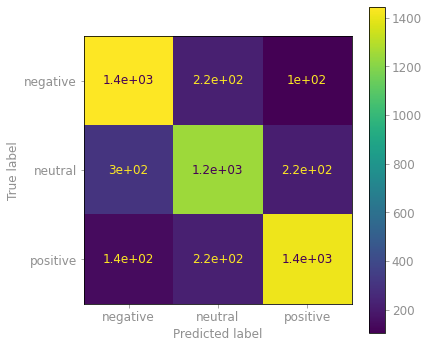

In [ ]:
generate_report(wordvec_train_df,y_resampled,model_with_best_params_svm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

    negative       0.81      0.96      0.88      2294
     neutral       0.78      0.45      0.57       775
    positive       0.84      0.70      0.76       591

    accuracy                           0.81      3660
   macro avg       0.81      0.70      0.74      3660
weighted avg       0.81      0.81      0.79      3660



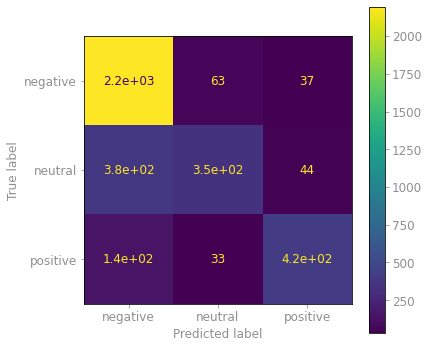

In [ ]:
generate_report(wordvec_test_df,testy,model_with_best_params_svm)

In [ ]:
## checking random forests with different w2v train test
best_score_rf,best_params_rf,model_with_best_params_rf = best_model('random_forest',wordvec_train_df,y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
best_score_rf

0.6096689240030098

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


              precision    recall  f1-score   support

    negative       0.98      0.99      0.99      1772
     neutral       0.98      0.97      0.98      1772
    positive       0.98      0.98      0.98      1772

    accuracy                           0.98      5316
   macro avg       0.98      0.98      0.98      5316
weighted avg       0.98      0.98      0.98      5316



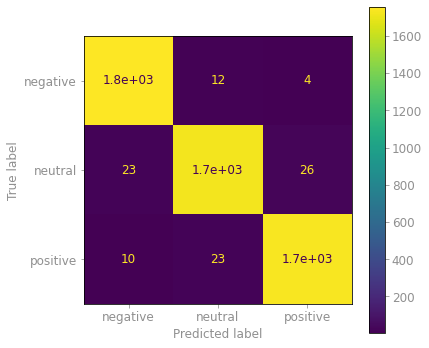

In [ ]:
generate_report(wordvec_train_df,y_resampled,model_with_best_params_rf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


              precision    recall  f1-score   support

    negative       0.98      1.00      0.99      2294
     neutral       0.99      0.95      0.97       775
    positive       0.98      0.96      0.97       591

    accuracy                           0.98      3660
   macro avg       0.98      0.97      0.98      3660
weighted avg       0.98      0.98      0.98      3660



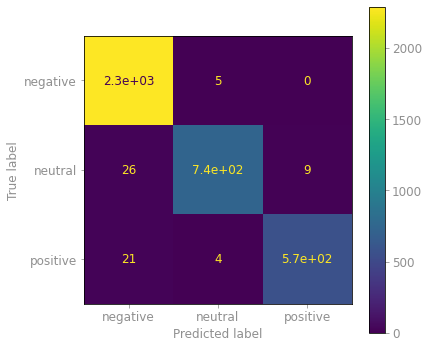

In [ ]:
generate_report(wordvec_test_df,testy,model_with_best_params_rf)

In [ ]:
## check the models once 
## generate embedding and identify the tweet whether it is positive,negative or neutral
sample_sentiment = 'getaway deal may 59 one-way lot cool city http://t.co/rpdbpx3wnd #cheapflights #farecompare'
sample_sentiment = get_vector(sample_sentiment).reshape(1,300)
model_with_best_params_rf.predict(sample_sentiment)

array(['negative'], dtype=object)

In [ ]:
airlines_df['text'][110]

'getaway deal may 59 one-way lot cool city http://t.co/rpdbpx3wnd #cheapflights #farecompare'

In [ ]:
airlines_df['airline_sentiment'][110]

'neutral'

In [ ]:
airlines_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus added commercial experience ... tacky,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,today ... must mean need take another trip,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,really aggressive blast obnoxious entertainmen...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,thank got different flight chicago,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,leaving 20 minute late flight warning communic...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,please bring american airline #blackberry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,money change flight answer phone suggestion ma...,NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
X_resampled
y_resampled

array([['negative'],
       ['negative'],
       ['negative'],
       ...,
       ['positive'],
       ['positive'],
       ['positive']], dtype=object)

In [ ]:
##neural networks 
# x_nn = airlines_df[['neural_text']]
x_nn = X_resampled
y_nn = y_resampled

# Neural Network with Embedding Layer

In [ ]:
## Loading the dataset
def join_words_back(x):
    return ' '.join(x)
# airlines_df['neural_text'] = airlines_df['text'].apply(lambda x : join_words_back(x))

# x_nn = airlines_df[['neural_text']]
x_nn = airlines_df[['text']]
y_nn = airlines_df[['airline_sentiment']]

##applying text vectorisation as per Tensorflow

In [ ]:
## creating vocabulary for the corpus
Vectorizer = TextVectorization()
Vectorizer.adapt(x_nn.to_numpy())
vocab = Vectorizer.get_vocabulary()


In [ ]:
#generate the embedding matrix
num_tokens = len(vocab)
embedding_dim = len(nlp('The').vector)
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for i, word in enumerate(vocab):
    embedding_matrix[i] = nlp(word).vector


We need to pass an embedding layer in our Deep Neural Network to deal with textual data . Generally we can train embeddings on our corpus itself or also use pre-trained word embeddings we generated earlier .

We create an embedding matrix which contains the embeddings that can be passed into the embedding layer .

In [ ]:
#Load the embedding matrix as the weights matrix for the embedding layer and set trainable to False
from keras.initializers import Constant

Embedding_layer=Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=False)

In [ ]:
##checking the embedding matrix
np.array_equal(embedding_matrix[2] ,nlp('flight').vector)


True

In [ ]:
x_train = x_nn['text']

In [ ]:
##alternatice code for train-test split neural networks 
x_train = x_nn

To make textual data suitable for passing into neural network , we need to tokenize our sentences into sequence of numerical indexes and then also make sure sentence length of each tweet is same sequence by padding it .

For padding we can pad every sentence by max sentence length in the corpus .

In [ ]:
##preprocrssing for texts to numbers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=len(vocab))
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [ ]:
## need to padd the sequences for same length 
len_of_sentences = []
for i in x_train:
    len_of_sentences.append(len(i))

print('Max length in sentences is',max(len_of_sentences))
print('Mean length of sentences is ',np.mean(len_of_sentences))

Max length in sentences is 131
Mean length of sentences is  60.802868852459014


In [ ]:
from keras.preprocessing.sequence import pad_sequences
x_train_seq = pad_sequences(sequences,maxlen=max(len_of_sentences))

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

y_cat = np.array(y_nn)

label_encoder = LabelEncoder()
y_cat = label_encoder.fit_transform(y_cat)
y_cat

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 2, 1, ..., 1, 0, 1])

We encode our sentiment column since its a categorical column, into suitable form by using One Hot encoding .

In [ ]:
## need to apply one hot encoding to the target column
y_cat = tf.keras.utils.to_categorical(y_cat,num_classes=3)
y_cat

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
##creating model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

model_ptw2v = Sequential()
e = Embedding(len(vocab), 300, weights=[embedding_matrix], input_length=131, trainable=False)
model_ptw2v.add(e)
model_ptw2v.add(Conv1D(filters=16, kernel_size=2, activation='relu'))
model_ptw2v.add(MaxPooling1D(pool_size=2))
model_ptw2v.add(Flatten())
model_ptw2v.add(Dense(32, activation='relu'))
model_ptw2v.add(Dense(3, activation='softmax'))
model_ptw2v.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_ptw2v.fit(x_train_seq, y_cat, validation_split=0.2, epochs=100, batch_size=16, verbose=2,callbacks=[es])


Epoch 1/100


ValueError: ignored

array([[   0,    0,    0, ...,    1,    1,  514],
       [   0,    0,    0, ...,  395,  768,  991],
       [   0,    0,    0, ...,   15, 3237,   93],
       ...,
       [   0,    0,    0, ...,    0,    0,    7],
       [   0,    0,    0, ..., 7617, 3057, 7618],
       [   0,    0,    0, ...,    7,  609,   72]], dtype=int32)

In [ ]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(vocab), 300, weights=[embedding_matrix], input_length=131, trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_seq, y_cat, validation_split=0.2, epochs=50, batch_size=16, verbose=2,callbacks=[es])


Epoch 1/50
732/732 - 100s - loss: 0.8008 - accuracy: 0.6602 - val_loss: 0.6052 - val_accuracy: 0.7753
Epoch 2/50
732/732 - 92s - loss: 0.6530 - accuracy: 0.7315 - val_loss: 0.5647 - val_accuracy: 0.7681
Epoch 3/50
732/732 - 91s - loss: 0.5668 - accuracy: 0.7703 - val_loss: 0.5476 - val_accuracy: 0.7787
Epoch 4/50
732/732 - 91s - loss: 0.4938 - accuracy: 0.8069 - val_loss: 0.5576 - val_accuracy: 0.7801
Epoch 5/50
732/732 - 90s - loss: 0.4306 - accuracy: 0.8356 - val_loss: 0.5782 - val_accuracy: 0.7702
Epoch 6/50
732/732 - 91s - loss: 0.3580 - accuracy: 0.8664 - val_loss: 0.6685 - val_accuracy: 0.7473
Epoch 7/50
732/732 - 92s - loss: 0.3054 - accuracy: 0.8864 - val_loss: 0.7217 - val_accuracy: 0.7490
Epoch 8/50
732/732 - 90s - loss: 0.2461 - accuracy: 0.9090 - val_loss: 0.7637 - val_accuracy: 0.7674


<Figure size 432x432 with 0 Axes>

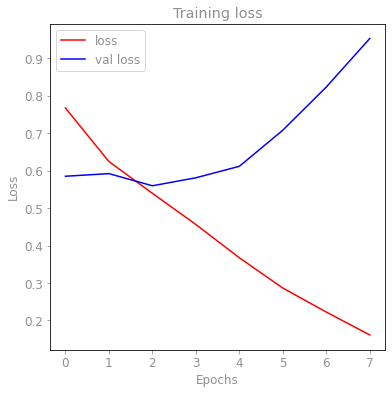

<Figure size 432x432 with 0 Axes>

In [ ]:
loss=history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r',label='loss')
plt.plot(epochs,val_loss,'blue',label='val loss')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.figure()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_seq, y_cat, validation_split=0.2, epochs=50, batch_size=16, verbose=2,callbacks=[es])


In [ ]:
##check the loss graph with validation loss


In [ ]:
## Hyper-parameter Tuning 
## Especially the learning rate 
## after getting the learning rate show the graph of loss and show your not overfitting 

# BERT

In [ ]:
## If time permits , best is to train and keep save the model into our drive 